In [74]:
import pandas as pd
from scipy.special import rel_entr
import matplotlib.pyplot as plt
import numpy as np
#calculate (P || Q)


In [2]:
df = pd.read_csv("text-alone-predictions.csv")

In [46]:
correct = df.loc[df["labels"] == df["predictions"]]

In [47]:
wrong = df.loc[df["labels"] != df["predictions"]]

In [48]:
correct["max_prob"] = correct.apply(lambda row: max(row[["p0", "p1", "p2", "p3", "p4"]].values), axis=1)
wrong["max_prob"] = wrong.apply(lambda row: max(row[["p0", "p1", "p2", "p3", "p4"]].values), axis=1)

correct["answer_label"] = correct.apply(lambda row: row["a%d"%(row["answer"])], axis=1)
wrong["answer_label"] = wrong.apply(lambda row: row["a%d"%(row["answer"])], axis=1)

correct["predicted_label"] = correct.apply(lambda row: row["a%d"%(row["predictions"])], axis=1)
wrong["predicted_label"] = wrong.apply(lambda row: row["a%d"%(row["predictions"])], axis=1)

correct["kl_div"] = correct.apply(lambda row: sum(rel_entr(row[["p0", "p1", "p2", "p3", "p4"]].values.tolist(), [0.2, 0.2, 0.2, 0.2, 0.2])), axis=1)
wrong["kl_div"] = wrong.apply(lambda row: sum(rel_entr(row[["p0", "p1", "p2", "p3", "p4"]].values.tolist(), [0.2, 0.2, 0.2, 0.2, 0.2])), axis=1)

correct = correct.sort_values(["max_prob"], ascending=False)
wrong = wrong.sort_values(["max_prob"], ascending=False)

/var/folders/4n/89dlbs9s4gv5r3mljb0bt4pm0000gn/T/ipykernel_44125/912151482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct["max_prob"] = correct.apply(lambda row: max(row[["p0", "p1", "p2", "p3", "p4"]].values), axis=1)
/var/folders/4n/89dlbs9s4gv5r3mljb0bt4pm0000gn/T/ipykernel_44125/912151482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong["max_prob"] = wrong.apply(lambda row: max(row[["p0", "p1", "p2", "p3", "p4"]].values), axis=1)
/var/folders/4n/89dlbs9s4gv5r3mljb0bt4pm0000gn/T/ipy

In [49]:
for x in wrong.iloc[:3][["question", "type", "answer_label", "predicted_label"]].values:
    print(" & ".join([f"{y}" for y in x]) + " \\\\")

why are there people standing on the roads that are meant for cars near the end of the video & CW & talking & waiting to cross \\
how did the people make sure they can see clearly in the dark & DO & shine light & wear spectacles \\
what did the lady in pink do after picking up the brush at first & TN & move it on the egg slowly & pick up more brushes \\


In [51]:
correct["kl_div"].values

array([1.60935268e+00, 1.60934055e+00, 1.60932799e+00, ...,
       7.36467626e-03, 1.18892218e-03, 1.09631791e-03])

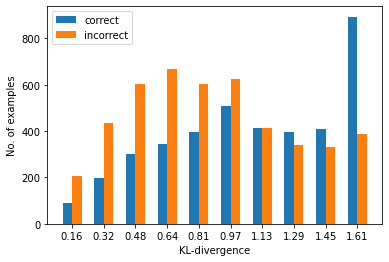

In [85]:
bins1 = plt.hist(correct["kl_div"].values, bins=10, width=0.1)
bins2 = plt.hist(wrong["kl_div"].values, bins=bins1[1], width=0.1)
plt.close()
plt.cla()
plt.bar(np.array(range(len(bins1[0]))) - 0.15, bins1[0], width=0.3, label="correct")
plt.bar(np.array(range(len(bins2[0]))) + 0.15 , bins2[0], width=0.3, label="incorrect")
plt.xticks(np.array(range(len(bins1[0]))), ["%0.2f"%x for x in bins1[1][1:]])
plt.xlabel("KL-divergence")
plt.ylabel("No. of examples")
plt.legend()
plt.savefig("confidence.png",dpi=120)
# bins = plt.hist(correct["kl_div"].values, bins=bins1[1], width=0.1)


(array([206., 437., 603., 670., 605., 623., 414., 339., 330., 388.]),
 array([1.09631791e-03, 1.61921954e-01, 3.22747590e-01, 4.83573226e-01,
        6.44398862e-01, 8.05224498e-01, 9.66050134e-01, 1.12687577e+00,
        1.28770141e+00, 1.44852704e+00, 1.60935268e+00]),
 <BarContainer object of 10 artists>)

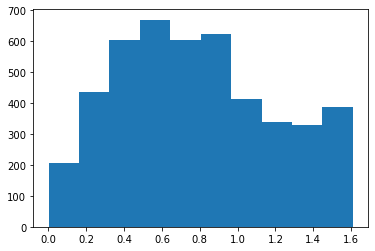